In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter, defaultdict

In [2]:
from google.colab import files
uploaded = files.upload()
# after executing this cell, click on "choose files" below and upload "evaluators_cluster.csv" from your local drive

Saving evaluators_cluster.csv to evaluators_cluster.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['evaluators_cluster.csv']))
X = df[['avg_assOB','avg_assOO','avg_assBO_6','avg_assBO_8','avg_assBB_6','avg_assBB_8']]
X_nomissing = X.dropna()

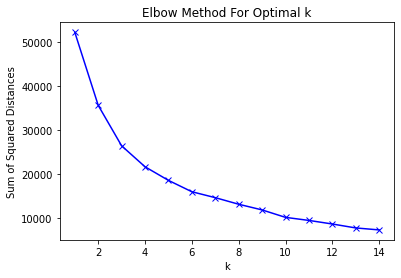

In [4]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, init='k-means++', 
            max_iter=300, n_init=10, verbose=0, random_state=7718)
    km = km.fit(X_nomissing)
    sum_of_squared_distances.append(km.inertia_)
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [5]:
kmeans = KMeans(n_clusters=3, init='k-means++', 
            max_iter=300, n_init=10, verbose=0, random_state=7718)
kmeans.fit(X_nomissing)
labels = kmeans.predict(X_nomissing)
X_nomissing['clusters'] = labels
centroids = kmeans.cluster_centers_
print(centroids)
print(Counter(kmeans.labels_))
#print(labels)

[[ 3.01179487 67.93794838 22.23179477 15.10333338 66.85220931 64.68378131]
 [ 0.08045454 69.52445427 41.48398491 42.09363609 50.90316109 51.24796436]
 [38.24500043 49.20511864 38.73990614 34.11299307 51.78786407 58.00992086]]
Counter({2: 14, 0: 13, 1: 11})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


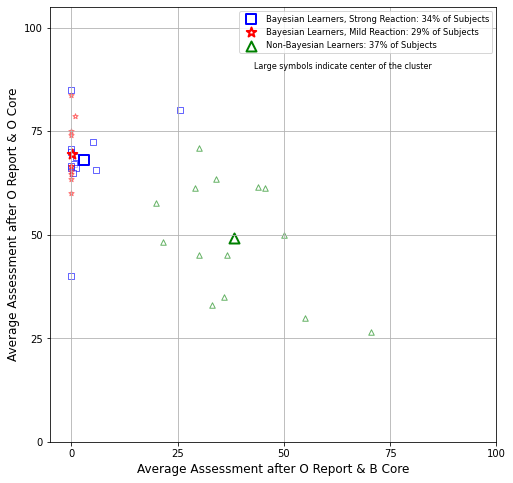

In [6]:
#Figure 4: Evaluators’ Strategies Grouped in Clusters, Orange Report.

col = ['b', 'r','g']
lab = ['Bayesian Learners, Strong Reaction: 34% of Subjects',
       'Bayesian Learners, Mild Reaction: 29% of Subjects',
       'Non-Bayesian Learners: 37% of Subjects',
       ]       
mar = ['s',
       '*',
       "^"]
fig = plt.figure(figsize=(8,8))

for i in range(3):
    plt.scatter(X_nomissing[X_nomissing.clusters==i].avg_assOB, X_nomissing[X_nomissing.clusters==i].avg_assOO, c = 'white', marker = mar[i], edgecolors=  col[i],  s=30, alpha =.6, label = '_nolabel')
    plt.scatter(centroids[i,0], centroids[i,1], c = 'white', s=100, alpha =1, marker = mar[i], edgecolors=  col[i], linewidths = 2 , label = lab[i])

plt.xlabel('Average Assessment after O Report & B Core',fontsize = 12)
plt.ylabel('Average Assessment after O Report & O Core',fontsize = 12)
plt.axis([-5, 80, 20, 105])
plt.text(43, 90, 'Large symbols indicate center of the cluster ', fontsize = 8)
plt.legend(loc = 'best', fontsize = 'small')
plt.yticks([0, 25, 50, 75, 100])
plt.xticks([0, 25, 50, 75, 100])
plt.grid(True)
plt.show()

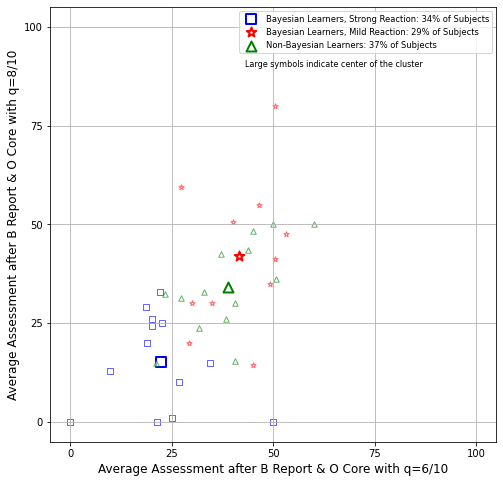

In [7]:
# Figure 5(a): Evaluators’ Strategies Grouped in Clusters, Inaccurate Blue Report
col = ['b', 'r','g']
lab = ['Bayesian Learners, Strong Reaction: 34% of Subjects',
       'Bayesian Learners, Mild Reaction: 29% of Subjects',
       'Non-Bayesian Learners: 37% of Subjects',
       ]  
mar = ['s',
       '*',
       "^"]
fig = plt.figure(figsize=(8,8))

for i in range(3):
    plt.scatter(X_nomissing[X_nomissing.clusters==i].avg_assBO_6, X_nomissing[X_nomissing.clusters==i].avg_assBO_8, c = 'white', marker = mar[i], edgecolors=  col[i],  s=30, alpha =.6, label = '_nolabel')
    plt.scatter(centroids[i,2], centroids[i,3], c = 'white', s=100, alpha =1, marker = mar[i], edgecolors=  col[i], linewidths = 2 , label = lab[i])

plt.xlabel('Average Assessment after B Report & O Core with q=6/10',fontsize = 12)
plt.ylabel('Average Assessment after B Report & O Core with q=8/10',fontsize = 12)
plt.axis([-5, 105, -5, 105])
plt.text(43, 90, 'Large symbols indicate center of the cluster ', fontsize = 8)
plt.legend(loc = 'best', fontsize = 'small')
plt.yticks([0, 25, 50, 75, 100])
plt.xticks([0, 25, 50, 75, 100])
plt.grid(True)
plt.show()

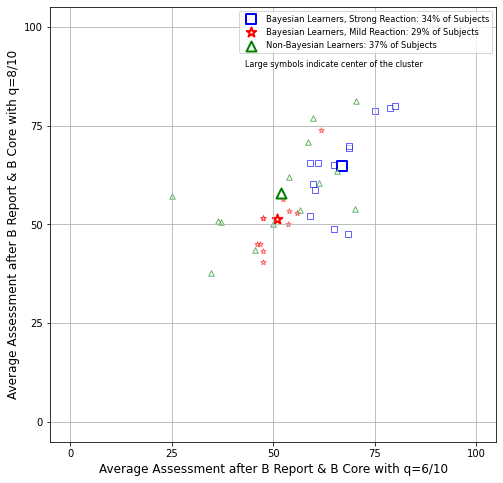

In [8]:
# Figure 5(b): Evaluators’ Strategies Grouped in Clusters, Accurate Blue Report
col = ['b', 'r','g']
lab = ['Bayesian Learners, Strong Reaction: 34% of Subjects',
       'Bayesian Learners, Mild Reaction: 29% of Subjects',
       'Non-Bayesian Learners: 37% of Subjects',
       ]  
mar = ['s',
       '*',
       "^"]
fig = plt.figure(figsize=(8,8))

for i in range(3):
    plt.scatter(X_nomissing[X_nomissing.clusters==i].avg_assBB_6, X_nomissing[X_nomissing.clusters==i].avg_assBB_8, c = 'white', marker = mar[i], edgecolors=  col[i],  s=30, alpha =.6, label = '_nolabel')
    plt.scatter(centroids[i,4], centroids[i,5], c = 'white', s=100, alpha =1, marker = mar[i], edgecolors=  col[i], linewidths = 2 , label = lab[i])

plt.xlabel('Average Assessment after B Report & B Core with q=6/10',fontsize = 12)
plt.ylabel('Average Assessment after B Report & B Core with q=8/10',fontsize = 12)
plt.axis([-5, 105, -5, 105])
plt.text(43, 90, 'Large symbols indicate center of the cluster ', fontsize = 8)
plt.legend(loc = 'best', fontsize = 'small')
plt.yticks([0, 25, 50, 75, 100])
plt.xticks([0, 25, 50, 75, 100])
plt.grid(True)
plt.show()